In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', 300)

In [ ]:
data = pd.read_csv("telecom_churn_data.csv", encoding= 'unicode_escape')

In [ ]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [ ]:
print(data.shape)
print(data.info())

(99999, 226)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
None


# Data Cleaning

### Find the columns for which more than 70% the values are missing

In [ ]:
pctDF = (data.isnull().sum()/len(data) * 100).reset_index()
pctDF.columns = ['Columns','Missing Value Percentage']
pctDF = pctDF[pctDF['Missing Value Percentage'] > 70]
pctDF

,Columns,Missing Value Percentage
157,date_of_last_rech_data_6,74.846748
158,date_of_last_rech_data_7,74.428744
159,date_of_last_rech_data_8,73.660737
160,date_of_last_rech_data_9,74.077741
161,total_rech_data_6,74.846748
162,total_rech_data_7,74.428744
163,total_rech_data_8,73.660737
164,total_rech_data_9,74.077741
165,max_rech_data_6,74.846748
166,max_rech_data_7,74.428744


### Dealing with columns which have 70+% missing values
- Some of the columns seems to be meaningful missing
    - night_pck_user* and fb_user* have meaningful missing
    - These customers have not opted for these services
    - we will impute missing values as 0
- av_rech_amt_data* and total_rech_data_* are also meaningful missing can be used to derive new feature Total amount spent by customers
- if both count_rech_2g_* and arpu_2g_* are missing that means its meaningful missing
- if both count_rech_3g_* and arpu_3g_* are missing that means its meaningful missing

In [ ]:
meaningful_missing_columns = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9',
                              'fb_user_6','fb_user_7','fb_user_8','fb_user_9']

for col in meaningful_missing_columns:
    data[col].fillna(0, inplace=True)

In [ ]:
for i in range(6, 10): # 6 to 9th Month
  count_rech_2g = 'count_rech_2g_{0}'.format(i)
  count_rech_3g = 'count_rech_3g_{0}'.format(i)
  arpu_2g = 'arpu_2g_{0}'.format(i)
  arpu_3g = 'arpu_3g_{0}'.format(i)

  mask_2g = (data[count_rech_2g].isna() & data[arpu_2g].isna())
  data.loc[mask_2g, [count_rech_2g, arpu_2g]] = data.loc[mask_2g, [count_rech_2g, arpu_2g]].fillna(0)

  mask_3g = (data[count_rech_3g].isna() & data[arpu_3g].isna())
  data.loc[mask_3g, [count_rech_3g, arpu_3g]] = data.loc[mask_3g, [count_rech_3g, arpu_3g]].fillna(0)


In [ ]:
# we will calculate total recharge amount for data
for i in range(6,10): # 6 to 9th Month
  
  av_rech_amt_data = 'av_rech_amt_data_{0}'.format(i)
  total_rech_data = 'total_rech_data_{0}'.format(i)

  data[av_rech_amt_data].fillna(0, inplace=True)
  data[total_rech_data].fillna(0, inplace=True)

  data['total_rech_data_amt_{0}'.format(i)] = data[av_rech_amt_data] * data[total_rech_data]
  data.drop(columns=[av_rech_amt_data, total_rech_data])


In [ ]:
pctDF = (data.isna().sum()/len(data) * 100).reset_index()
pctDF.columns = ['Columns','Missing Value Percentage']
pctDF = pctDF[pctDF['Missing Value Percentage'] > 70]
pctDF

,Columns,Missing Value Percentage
157,date_of_last_rech_data_6,74.846748
158,date_of_last_rech_data_7,74.428744
159,date_of_last_rech_data_8,73.660737
160,date_of_last_rech_data_9,74.077741
165,max_rech_data_6,74.846748
166,max_rech_data_7,74.428744
167,max_rech_data_8,73.660737
168,max_rech_data_9,74.077741


In [ ]:
# Now the remaining columns are not useful lets drop them.
columns = list(map(lambda x: x, pctDF['Columns']))
data.drop(columns = columns, inplace=True)
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_data_amt_9
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,2

In [ ]:
print(data.shape)
print(data.info())

(99999, 222)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 222 entries, mobile_number to total_rech_data_amt_9
dtypes: float64(179), int64(35), object(8)
memory usage: 169.4+ MB
None


### Drop the mobile_number, circleid columns as the are not significant in model building

In [ ]:
#Remove the mobile_number Columns
data.drop(columns = ['mobile_number','circle_id'], inplace=True)

In [ ]:
data.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_data_amt_9
0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.

### Now check for the columns which have low number missing values (> 0% and < 7%)
- Around 126 columns have missing values between 0.6 to 7%
- We will use advanced imputation techniques like KNN to impute these columns

In [ ]:
pctDF = (data.isnull().sum()/len(data) * 100).reset_index()
pctDF.columns = ['Columns','Missing Value Percentage']
pctDF = pctDF[pctDF['Missing Value Percentage'] > 0]
pctDF

,Columns,Missing Value Percentage
0,loc_og_t2o_mou,1.018010
1,std_og_t2o_mou,1.018010
2,loc_ic_t2o_mou,1.018010
4,last_date_of_month_7,0.601006
5,last_date_of_month_8,1.100011
...,...,...
134,ic_others_9,7.745077
147,date_of_last_rech_6,1.607016
148,date_of_last_rech_7,1.767018
149,date_of_last_rech_8,3.622036


### Handle last_date_of_month_* and 'date_of_last_rech_* columns

In [ ]:
#these columns have all the values as same, lets drop them
# date_of_last_rech_* columns are not useful for model building
date_columns = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9',
                'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9']

data.drop(columns = date_columns, inplace=True)
data.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_data_amt_9
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,0.00,212.17,212.17,212.17,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,0.0,968,30.4,0.0,101.20,3.58,252.0,252.0,252.0,

### Impute missing data with sklearn KNNImputer

In [ ]:
from sklearn.impute import KNNImputer

knnImputer = KNNImputer(n_neighbors=5)
imputedData = knnImputer.fit_transform(data)

In [ ]:
knnDF = pd.DataFrame(imputedData)
knnDF.columns = data.columns
knnDF.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_data_amt_9
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,1.622,11.486,0.00,3.964,23.642,50.106,0.00,22.726,17.852,11.322,0.00,5.476,15.176,8.928,0.00,10.492,1.516,5.02,0.00,3.964,8.574,23.408,0.00,6.91,0.00,3.688,0.00,0.016,0.0,0.00,0.00,0.452,10.092,32.12,0.00,10.894,0.00,3.016,0.00,0.00,0.00,12.126,0.00,4.446,0.00,5.376,0.00,0.0,0.0,0.0,0.0,0.0,0.00,20.518,0.00,4.446,0.0,0.0,0.0,0.402,0.00,0.022,0.00,0.804,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,36.784,17.776,0.16,18.908,33.47,29.396,4.13,14.586,2.47,1.91,1.15,1.08,72.728,49.09,5.44,34.582,3.238,3.198,0.00,0.624,19.404,6.79,0.00,2.922,0.00,0.00,0.00,0.066,0.0,0.0,0.0,0.0,22.644,9.99,0.00,3.614,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,1

### Check for Missing Values again after KNN Imputation
- No Missing values found

In [ ]:
pctDF = (knnDF.isnull().sum()/len(knnDF) * 100).reset_index()
pctDF.columns = ['Columns','Missing Value Percentage']
pctDF = pctDF[pctDF['Missing Value Percentage'] > 0]
pctDF

,Columns,Missing Value Percentage


# Feature Engineering


### Create new feature based on existing features in the data

In [ ]:
# Create new feature "total_recharge_amt" using total_rech_amt_* columns
knnDF['total_rech_amount'] = knnDF['total_rech_amt_6'] + knnDF['total_rech_amt_7'] + knnDF['total_rech_amt_8'] + knnDF['total_rech_amt_9']

# Create new feature "total_recharge_num" using total_rech_num_* columns
knnDF['total_rech_num'] = knnDF['total_rech_num_6'] + knnDF['total_rech_num_7'] + knnDF['total_rech_num_8'] + knnDF['total_rech_num_9']

# Create new feature "avg_rech_amt" for June and July month
knnDF['avg_rech_amt_6_7'] = (knnDF['total_rech_amt_6'] + knnDF['total_rech_amt_7']) / 2

knnDF.drop(columns = ['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_rech_amt_9'], inplace=True)
knnDF.drop(columns = ['total_rech_num_6','total_rech_num_7','total_rech_num_8','total_rech_num_9'], inplace=True)

In [ ]:
knnDF.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_data_amt_9,total_rech_amount,total_rech_num,avg_rech_amt_6_7
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,1.622,11.486,0.00,3.964,23.642,50.106,0.00,22.726,17.852,11.322,0.00,5.476,15.176,8.928,0.00,10.492,1.516,5.02,0.00,3.964,8.574,23.408,0.00,6.91,0.00,3.688,0.00,0.016,0.0,0.00,0.00,0.452,10.092,32.12,0.00,10.894,0.00,3.016,0.00,0.00,0.00,12.126,0.00,4.446,0.00,5.376,0.00,0.0,0.0,0.0,0.0,0.0,0.00,20.518,0.00,4.446,0.0,0.0,0.0,0.402,0.00,0.022,0.00,0.804,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,36.784,17.776,0.16,18.908,33.47,29.396,4.13,14.586,2.47,1.91,1.15,1.08,72.728,49.09,5.44,34.582,3.238,3.198,0.00,0.624,19.404,6.79,0.00,2.922,0.00,0.00,0.00,0.066,0.0,0.0,0.0,0.0,22.644,9.99,0.00,3.614,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,0.00,212.17,212.17,212.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0

### Find High Value Customers because any company's 80% revenue comes from 20% of high values customers

In [ ]:
# Take all the customer who have avg_rech_amt >= 70% percentile
knnDF = knnDF[knnDF['avg_rech_amt_6_7'] >= knnDF['avg_rech_amt_6_7'].quantile(0.7)]
knnDF.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_data_amt_9,total_rech_amount,total_rech_num,avg_rech_amt_6_7
7,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,42.374,453.43,567.16,325.91,230.00,16.23,33.49,31.64,41.004,23.74,12.59,38.06,47.784,51.39,31.38,40.28,29.524,308.63,447.38,162.28,106.634,62.13,55.14,53.23,12.24,0.0,0.0,0.00,1.162,422.16,533.91,255.79,148.406,4.30,23.29,12.01,3.354,49.89,31.76,49.14,50.36,6.66,20.08,16.68,0.07,0.0,0.0,0.0,0.0,60.86,75.14,77.84,53.788,0.0,0.18,10.01,20.304,4.50,0.00,6.50,2.584,0.00,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,23.52,217.56,221.49,121.19,115.848,152.16,101.46,39.53,8.06,427.88,355.23,188.04,147.436,36.89,11.83,30.39,11.916,91.44,126.99,141.33,37.942,52.19,34.24,22.21,4.878,0.0,0.0,0.0,0.0,180.54,173.08,193.94,54.742,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.0,2.06,14.53,31.59,45.08,15.74,15.19,15.14,0.00,1580.0,790.0,1580.0,0.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
knnDF.shape

(30011, 207)

# Derive Churn - Find out the customer who are churned on the 9th Month
- 9th Month is churn phase
- We will consider customers as churned who stopped using internet data or stopped incoming and outgoing calls

In [ ]:
# Total incoming and outgoing minutes
knnDF['total_ic_og_9'] = knnDF['total_ic_mou_9'] + knnDF['total_og_mou_9']

#total data usage volume in 2G or 3G
knnDF['total_data_usage_9'] = knnDF['vol_2g_mb_9'] + knnDF['vol_3g_mb_9']

knnDF.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_data_amt_9,total_rech_amount,total_rech_num,avg_rech_amt_6_7,total_ic_og_9,total_data_usage_9
7,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,42.374,453.43,567.16,325.91,230.00,16.23,33.49,31.64,41.004,23.74,12.59,38.06,47.784,51.39,31.38,40.28,29.524,308.63,447.38,162.28,106.634,62.13,55.14,53.23,12.24,0.0,0.0,0.00,1.162,422.16,533.91,255.79,148.406,4.30,23.29,12.01,3.354,49.89,31.76,49.14,50.36,6.66,20.08,16.68,0.07,0.0,0.0,0.0,0.0,60.86,75.14,77.84,53.788,0.0,0.18,10.01,20.304,4.50,0.00,6.50,2.584,0.00,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,23.52,217.56,221.49,121.19,115.848,152.16,101.46,39.53,8.06,427.88,355.23,188.04,147.436,36.89,11.83,30.39,11.916,91.44,126.99,141.33,37.942,52.19,34.24,22.21,4.878,0.0,0.0,0.0,0.0,180.54,173.08,193.94,54.742,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.0,2.06,14.53,31.59,45.08,15.74,15.19,15.14,0.00,1580.0,790.0,1580.0,0.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0

In [ ]:
knnDF['churn'] = np.where((knnDF['total_ic_og_9'] == 0) & (knnDF['total_data_usage_9'] == 0), 1, 0)
knnDF.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_data_amt_9,total_rech_amount,total_rech_num,avg_rech_amt_6_7,total_ic_og_9,total_data_usage_9,churn
7,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,42.374,453.43,567.16,325.91,230.00,16.23,33.49,31.64,41.004,23.74,12.59,38.06,47.784,51.39,31.38,40.28,29.524,308.63,447.38,162.28,106.634,62.13,55.14,53.23,12.24,0.0,0.0,0.00,1.162,422.16,533.91,255.79,148.406,4.30,23.29,12.01,3.354,49.89,31.76,49.14,50.36,6.66,20.08,16.68,0.07,0.0,0.0,0.0,0.0,60.86,75.14,77.84,53.788,0.0,0.18,10.01,20.304,4.50,0.00,6.50,2.584,0.00,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,23.52,217.56,221.49,121.19,115.848,152.16,101.46,39.53,8.06,427.88,355.23,188.04,147.436,36.89,11.83,30.39,11.916,91.44,126.99,141.33,37.942,52.19,34.24,22.21,4.878,0.0,0.0,0.0,0.0,180.54,173.08,193.94,54.742,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.0,2.06,14.53,31.59,45.08,15.74,15.19,15.14,0.00,1580.0,790.0,1580.0,0.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.

### Check Churned Customer Percentage
- We can say 8.6% customer churned based on their Usage on 9th Month

In [ ]:
knnDF.churn.value_counts() / len(knnDF) * 100

0    91.359835
1     8.640165
Name: churn, dtype: float64

### Drop all the columns for churn month (9th Month)

In [ ]:
last_month_columns = list(filter(lambda x: x.find("_9") > 0, list(knnDF.columns)))
last_month_columns.append('sep_vbc_3g')

finalDF = knnDF.drop(columns = last_month_columns)

finalDF.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_amount,total_rech_num,avg_rech_amt_6_7,churn
7,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,0.0,0.0,0.0,6008.0,20.0,1185.0,1
8,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,90.0,154.0,30.0,50.0,0.0,10.0,0.0,2.0,3.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,0.0,0.0,19.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,315.0,21.03,910.65,122.16,0.0,354.0,207.0,1344.0,69.0,519.0,0
13,0.0,0.0,0.0,492.846,205.671,5

# Exploratory Data Analysis

## Outlier Detection and Treamment
- There are outliers in the data, outliers will interfere in building the good models
- we will have to treat the outliers in-order to build model on that data

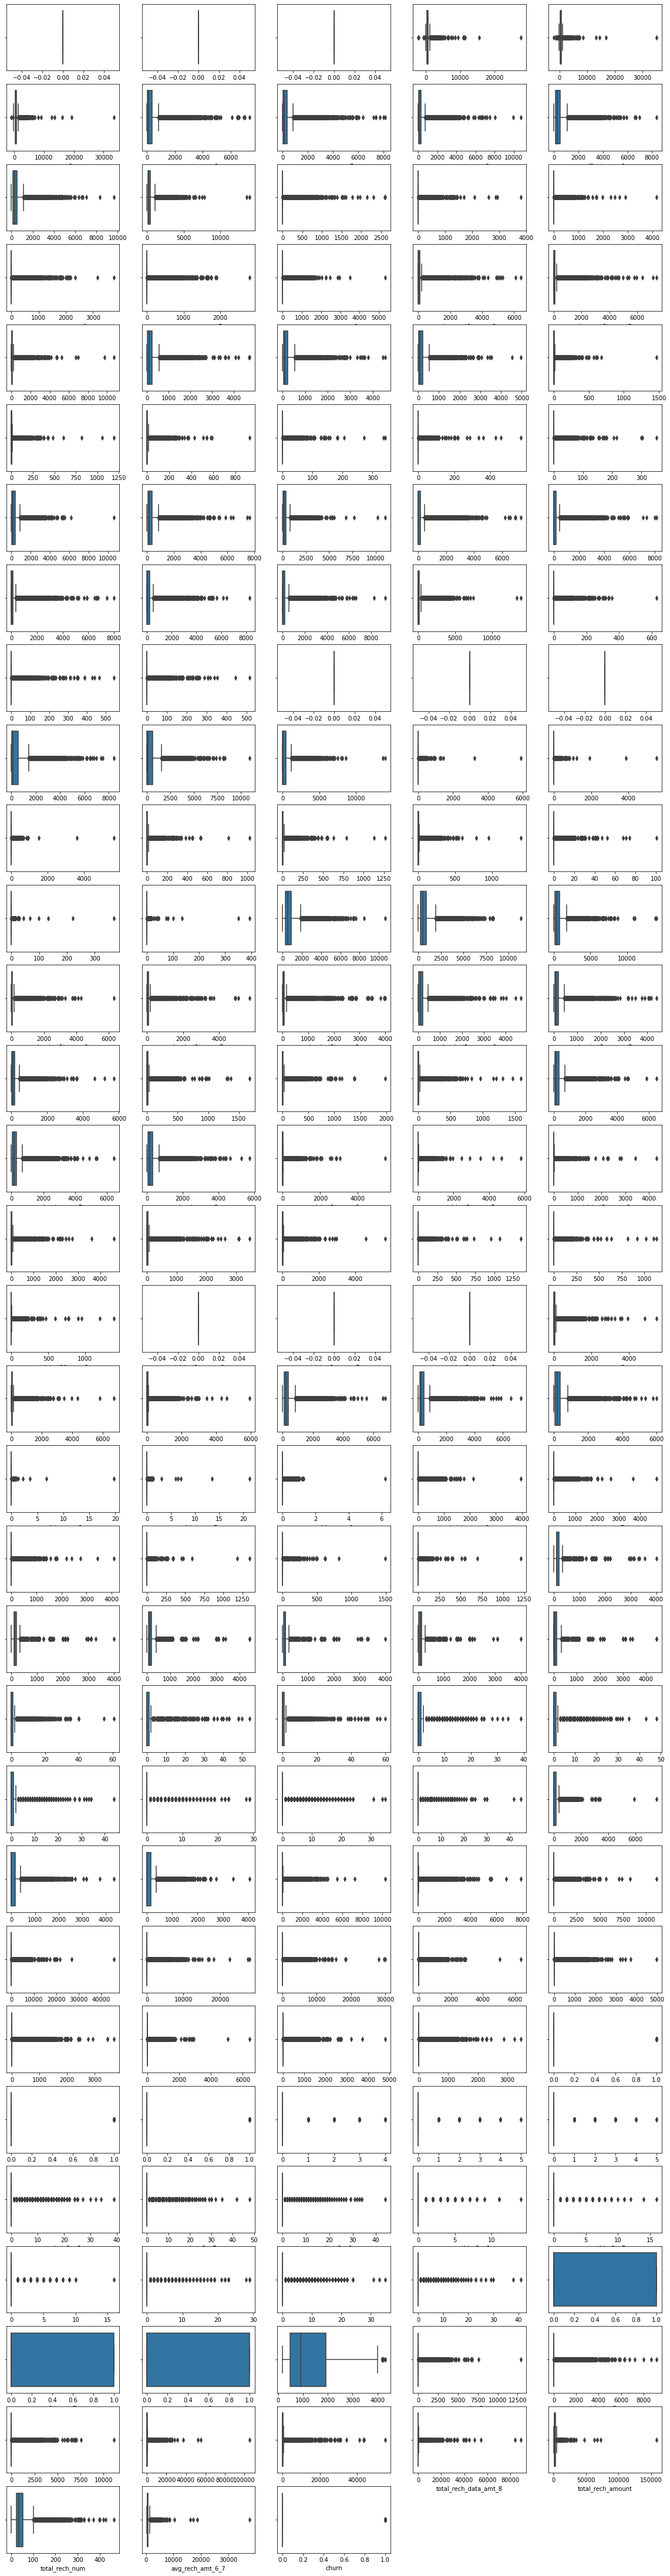

In [ ]:
plt.figure(figsize  = (20,100))
for i in enumerate(finalDF.columns):
    plt.subplot(40, 5, i[0]+1)
    sns.boxplot(data=finalDF, x=i[1])

In [ ]:
no_need_to_treat_outliers_for = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8',
                                 'night_pck_user_7', 'night_pck_user_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','monthly_2g_6',
                                 'monthly_2g_7','monthly_2g_8', 'sachet_2g_6','sachet_2g_7','sachet_2g_8','monthly_3g_6','monthly_3g_7','monthly_3g_8', 'sachet_3g_6',
                                 'sachet_3g_7','sachet_3g_8','fb_user_6','fb_user_7','fb_user_7','aon','churn'
                                 ]

for col in finalDF.columns.drop(no_need_to_treat_outliers_for):
  q4 = finalDF[col].quantile(0.99)
  finalDF[col][finalDF[col] >=  q4] = q4

### After Outlier treatment
- Data looks much better in terms of outliers now

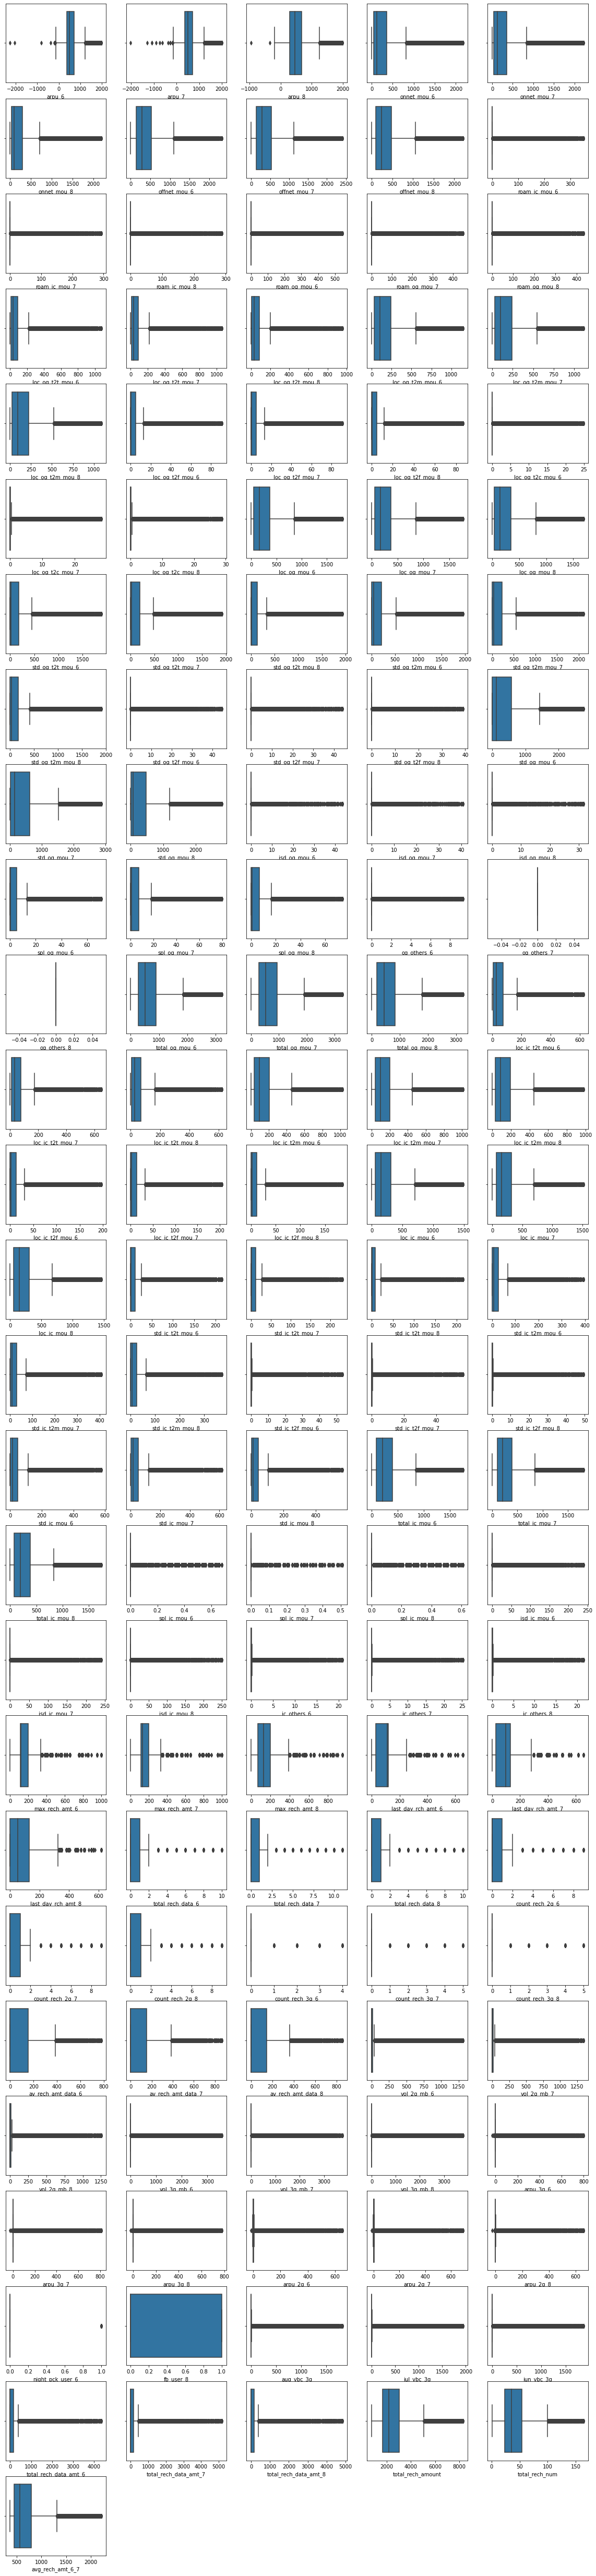

In [ ]:
plt.figure(figsize  = (20,100))
for i in enumerate(finalDF.columns.drop(no_need_to_treat_outliers_for)):
    plt.subplot(30, 5, i[0]+1)
    sns.boxplot(data=finalDF, x=i[1])

### Distribution after outlier treatment

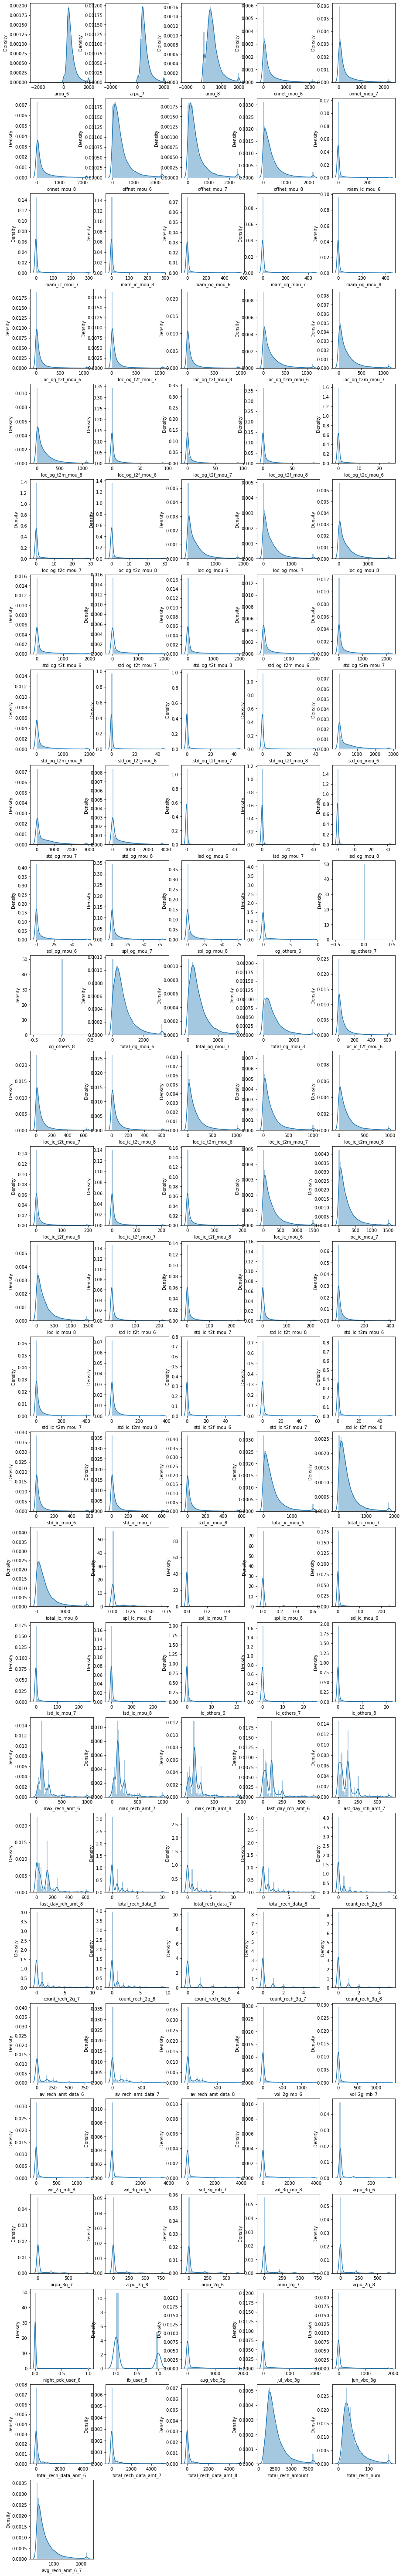

In [ ]:
columns = finalDF.columns.drop(no_need_to_treat_outliers_for)
plt.figure(figsize  = (15,120))
for i in enumerate(columns):
    plt.subplot(30, 5, i[0]+1)
    sns.distplot(finalDF[i[1]])

### Top 10 Highly Correlated independent variables
- There are lot of correlated values with 90% correlation

In [ ]:
corr = finalDF.corr()
corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corr_df = corr.unstack().reset_index()
corr_df.columns = ['Variable1', 'Variable2', 'Correlation']
corr_df.dropna(subset = ['Correlation'], inplace=True)
corr_df['Correlation'] = round(corr_df['Correlation'].abs(), 2)
corr_df.sort_values(by = 'Correlation', ascending=False).head(10)


,Variable1,Variable2,Correlation
20031,arpu_2g_6,arpu_3g_6,0.94
20349,arpu_2g_8,arpu_3g_8,0.94
20190,arpu_2g_7,arpu_3g_7,0.94
21756,sachet_2g_8,count_rech_2g_8,0.92
21438,sachet_2g_6,count_rech_2g_6,0.92
21597,sachet_2g_7,count_rech_2g_7,0.91
13815,total_ic_mou_6,loc_ic_mou_6,0.90
14133,total_ic_mou_8,loc_ic_mou_8,0.90
10965,loc_ic_mou_6,loc_ic_t2m_mou_6,0.89
13974,total_ic_mou_7,loc_ic_mou_7,0.89


# Check Data Imbalance
- There is big imbalance in data in terms of churn variable
- We will have balance the dataset while buidling the model.

In [ ]:
finalDF.churn.value_counts() / len(finalDF) * 100

0    91.359835
1     8.640165
Name: churn, dtype: float64

In [ ]:
finalDF.shape

(30011, 158)

### Fix imbalance of the data using SMOTE technique

In [ ]:
from imblearn.over_sampling import SMOTE

finalDF_X = finalDF.drop(columns = ['churn'])
finalDF_y = finalDF['churn']

sampler = SMOTE(random_state = 0)
X_smote, y_smote = sampler.fit_resample(finalDF_X, finalDF_y)

In [ ]:
y_smote.shape

(54836,)

In [ ]:
pd.DataFrame(X_smote).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156
0,0.0,0.0,0.0,1069.180,1349.850,1987.9344,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.590,15.740,15.19,15.14,1000.0,790.0,951.0,0.0,0.0,619.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,0.0,0.0,0.0,6008.0,20.0,1185.0
1,0.0,0.0,0.0,378.721,492.223,137.3620,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.000,0.000,0.00,0.00,90.0,154.0,30.0,50.0,0.0,10.0,0.0,2.0,3.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,0.0,0.0,19.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,315.0,21.03,910.65,122.16,0.0,354.0,207.0,1344.0,69.0,519.0
2,0.0,0.0,0.0,492.846,205.671,593.2600,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,239.60,62.11,250.333,20.908,16.24,21.44,110.0,110.0,130.0,110.0,50.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0,0.02,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2607.0,0.00,0.00,0.00,0.0,0.0,207.0,1830.0,28.0,380.0
3,0.0,0.0,0.0,430.975,299.869,187.8940,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.00,0.00,0.00,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.00,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.00,2.18,0.0,0.0,0.0,87.99,151.73,82.44,364.86,381.56,294.46,0.00,0.0,0.0,0.00,0.00,0.230,0.000,0.00,0.00,110.0,110.0,130.0,100.0,100.0,130.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,511.0,0.00,2.45,21.89,0.0,0.0,0.0,1298.0,19.0,459.0
4,0.0,0.0,0.0,690.008,18.980,25.4990,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,4.76,4.81,0.00,8.46,13.34,38.99,0.00,0.00,58.54,0.00,0.00,0.00

In [ ]:
df1 = pd.DataFrame(X_smote)
df1.columns = finalDF_X.columns
df2 = pd.DataFrame(y_smote)
df2.columns = ['churn']

balancedDF = pd.concat([df1, df2], axis=1)
balancedDF.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_amount,total_rech_num,avg_rech_amt_6_7,churn
0,0.0,0.0,0.0,1069.180,1349.850,1987.9344,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.590,15.740,15.19,15.14,1000.0,790.0,951.0,0.0,0.0,619.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,0.0,0.0,0.0,6008.0,20.0,1185.0,1
1,0.0,0.0,0.0,378.721,492.223,137.3620,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.000,0.000,0.00,0.00,90.0,154.0,30.0,50.0,0.0,10.0,0.0,2.0,3.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,0.0,0.0,19.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,315.0,21.03,910.65,122.16,0.0,354.0,207.0,1344.0,69.0,519.0,0
2,0.0,0.0,0.0,492.846,205.6

In [ ]:
balancedDF.shape

# Model Building and Evaluation

## Interpretable Model
- We will use Logistic Regression Model
- We will use SMOTE method to deal with imbalance of data

In [ ]:
# Split the Data in train and test set

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from sklearn.preprocessing import StandardScaler

train_set, test_set = train_test_split(balancedDF, 
                                       train_size=0.7, 
                                       random_state=100)



In [ ]:
# Futher divide the dataset in X_train and y_train
y_train = train_set.pop('churn')
X_train = train_set

In [ ]:
# apply scaling on the X_train data
stdScaler = StandardScaler()
X_train[X_train.columns] = stdScaler.fit_transform(X_train[X_train.columns])
X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_amount,total_rech_num,avg_rech_amt_6_7
23364,0.0,0.0,0.0,-0.230842,0.787874,3.017306,-0.629189,-0.028592,1.505683,0.094720,0.272537,2.870748,-0.309464,-0.329812,-0.355346,-0.323899,-0.366497,-0.385316,-0.154835,1.594772,5.506179,1.175695,1.343139,5.737548,1.506100,2.813260,4.968584,-0.101425,1.552324,-0.272796,0.726379,1.728400,5.823645,-0.575608,-0.540302,-0.343096,-0.431713,-0.333760,-0.178841,2.301569,-0.153196,2.917420,0.0,0.0,0.0,-0.658707,-0.583037,-0.314915,-0.205082,-0.194858,-0.158978,-0.143228,0.675122,4.296124,-0.444556,0.0,0.0,-0.313041,0.208455,2.871252,-0.570743,1.177365,0.828838,-0.046048,1.029710,3.155579,-0.357119,-0.291134,-0.235488,-0.287852,1.055607,2.361152,-0.455931,-0.428785,-0.344452,5.009838,2.779684,5.629490,-0.270760,-0.082995,-0.237902,0.0,0.0,0.0,3.122030,1.648393,3.572909,0.608762,1.295944,2.830099,-0.474729,-0.222525,-0.22752,-0.285507,-0.282078,-0.234659,4.158991,0.147199,-0.201608,-0.077471,-0.314136,0.208918,0.520730,0.123861,-0.133639,-0.470368,-0.456073,-0.422157,-0.383919,-0.382577,-0.357793,-0.362817,-0.337168,-0.285812,-0.491490,-0.477878,-0.412508,-0.317112,-0.298960,-0.252904,-0.341827,-0.338050,-0.298653,-0.339016,-0.330942,-0.287467,-0.362346,-0.348944,-0.297892,-0.105288,-0.093397,-0.079884,-0.291137,-0.282889,-0.243134,-0.284872,-0.280845,-0.27904,-0.288695,-0.275400,-0.237514,-0.156831,-0.140329,-0.122365,-0.656958,-0.634308,-0.533629,0.066107,-0.304152,-0.326649,-0.330725,-0.338440,-0.324921,-0.282966,1.759895,0.568376,0.202963
46141,0.0,0.0,0.0,2.083514,-0.164090,-1.030841,1.627644,0.186368,-0.401722,1.831570,0.112694,-0.496023,-0.320183,-0.329812,0.204418,-0.343228,-0.366497,-0.077395,-0.410852,-0.484018,-0.382134,0.277053,-0.288324,-0.542303,-0.347347,-0.386207,-0.347781

In [ ]:
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15 )
rfe = rfe.fit(X_train, y_train)

In [ ]:
#useful columns according to rfe
useful_cols = X_train.columns[rfe.support_]
useful_cols

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_7', 'roam_og_mou_8',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8',
       'std_og_mou_8', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_8',
       'fb_user_8', 'total_rech_amount', 'avg_rech_amt_6_7'],
      dtype='object')

In [ ]:
X_train_rfe = X_train[useful_cols]
X_train_rfe.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_7,roam_og_mou_8,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_mou_8,total_og_mou_7,total_og_mou_8,total_ic_mou_8,fb_user_8,total_rech_amount,avg_rech_amt_6_7
23364,-0.230842,0.787874,3.017306,-0.028592,-0.385316,-0.540302,-0.343096,-0.178841,-0.314915,0.208455,2.871252,2.830099,-0.533629,1.759895,0.202963
46141,2.083514,-0.164090,-1.030841,0.186368,-0.077395,0.426513,-0.289136,-0.237165,-0.342721,0.236574,-0.748477,-0.674424,-0.533629,-0.004226,1.087723
18234,-0.263177,0.194255,0.896384,1.475041,-0.385316,1.788793,4.058632,0.058192,2.615518,0.836650,2.073452,-0.345378,-0.533629,0.646203,-0.081572
33837,1.650314,-0.199920,-0.845725,-0.579395,-0.285247,-0.466679,-0.400872,-0.140382,-0.355524,0.230679,-0.595227,-0.672241,-0.533629,-0.077838,0.863025
3882,0.899608,1.216998,-0.021484,-0.341045,0.590989,-0.184339,-0.406859,-0.442063,-0.542100,-0.597183,-0.748477,-0.674424,-0.533629,1.469831,1.184607


In [ ]:
def checkVIF():
    vif = pd.DataFrame()
    vif['Feaures'] = X_train_sm.columns
    vif['VIF'] = [VIF(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
    vif = vif.sort_values(by = 'VIF', ascending=False)
    return vif

In [ ]:
# Logistic Regression Model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train_rfe)
lm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
lmfit = lm.fit()
lmfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38385
Model:                            GLM   Df Residuals:                    38369
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10053.
Date:                Sat, 28 Nov 2020   Deviance:                       20107.
Time:                        05:44:49   Pearson chi2:                 8.95e+11
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.9079      0.026    -34.953      0.000      -0.959      -0.857
arpu_6                1.1654      0.055     21.193      0.000       1.058       1.273
arpu_7                1.4263      0.065     21.959      0.000       1.299       1.554
arpu_8                3.5278      0.078     45.358      0.000       3.375       3.680
onnet_mou_7           0.4618      0.073      6.339      0.000       0.319       0.605
roam_og_mou_8         0.6989      0.027     26.295      0.000       0.647       0.751
std_og_t2t_mou_7     -0.4440      0.073     -6.111      0.000      -0.586      -0.302
std_og_t2t_mou_8     -1.1563      0.146     -7.936      0.000      -1.442      -0.871
std_og_t2m_mou_8     -1.1072      0.133     -8.338      0.000      -1.367      -0.847
std_og_mou_8          3.1859      0.231     13.801      0.000       2.733       3.638
total_og_mou_7       -0.2496      0.051     -4.901      0.000      -0.349      -0.150
total_og_mou_8       -2.1828      0.120    -18.156      0.000      -2.418      -1.947
total_ic_mou_8       -0.8995      0.042    -21.637      0.000      -0.981      -0.818
fb_user_8            -0.6140      0.023    -26.912      0.000      -0.659      -0.569
total_rech_amount    -9.8492      0.131    -75.394      0.000     -10.105      -9.593
avg_rech_amt_6_7      4.4573      0.103     43.227      0.000       4.255       4.659
=====================================================================================
"""

#### Manual Feature Elimination

In [ ]:
checkVIF()

,Feaures,VIF
9,std_og_mou_8,74.059244
7,std_og_t2t_mou_8,32.522581
8,std_og_t2m_mou_8,28.276813
15,avg_rech_amt_6_7,18.171010
14,total_rech_amount,14.829068
11,total_og_mou_8,12.769771
6,std_og_t2t_mou_7,9.854387
4,onnet_mou_7,9.017807
3,arpu_8,8.311827
2,arpu_7,7.823201


In [ ]:
# drop the column with High VIF ==> total_og_mou_8
X_train_sm = X_train_sm.drop(columns=['total_og_mou_8'])
lm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
lmfit = lm.fit()
lmfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38385
Model:                            GLM   Df Residuals:                    38370
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10244.
Date:                Sat, 28 Nov 2020   Deviance:                       20488.
Time:                        05:44:49   Pearson chi2:                 7.28e+11
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.8300      0.025    -33.504      0.000      -0.879      -0.781
arpu_6                1.1776      0.055     21.307      0.000       1.069       1.286
arpu_7                1.6090      0.065     24.878      0.000       1.482       1.736
arpu_8                2.9786      0.070     42.266      0.000       2.840       3.117
onnet_mou_7          -0.0325      0.057     -0.566      0.571      -0.145       0.080
roam_og_mou_8         0.8628      0.026     33.443      0.000       0.812       0.913
std_og_t2t_mou_7      0.1670      0.057      2.941      0.003       0.056       0.278
std_og_t2t_mou_8     -1.0571      0.142     -7.452      0.000      -1.335      -0.779
std_og_t2m_mou_8     -0.8929      0.129     -6.929      0.000      -1.145      -0.640
std_og_mou_8          1.4352      0.203      7.055      0.000       1.037       1.834
total_og_mou_7       -0.5990      0.045    -13.208      0.000      -0.688      -0.510
total_ic_mou_8       -1.2292      0.040    -30.663      0.000      -1.308      -1.151
fb_user_8            -0.5599      0.022    -24.934      0.000      -0.604      -0.516
total_rech_amount    -9.8531      0.129    -76.644      0.000     -10.105      -9.601
avg_rech_amt_6_7      4.4985      0.103     43.479      0.000       4.296       4.701
=====================================================================================
"""

In [ ]:
checkVIF()

,Feaures,VIF
9,std_og_mou_8,68.124940
7,std_og_t2t_mou_8,32.522068
8,std_og_t2m_mou_8,28.209101
14,avg_rech_amt_6_7,18.030385
13,total_rech_amount,14.527048
2,arpu_7,7.594968
6,std_og_t2t_mou_7,7.455227
4,onnet_mou_7,7.446280
3,arpu_8,7.366715
1,arpu_6,6.197020


In [ ]:
# drop the column with High VIF ==> std_og_mou_8
X_train_sm = X_train_sm.drop(columns=['std_og_mou_8'])
lm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
lmfit = lm.fit()
lmfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38385
Model:                            GLM   Df Residuals:                    38371
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10268.
Date:                Sat, 28 Nov 2020   Deviance:                       20537.
Time:                        05:44:50   Pearson chi2:                 8.25e+11
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.8348      0.025    -33.670      0.000      -0.883      -0.786
arpu_6                1.1848      0.055     21.429      0.000       1.076       1.293
arpu_7                1.6135      0.065     24.932      0.000       1.487       1.740
arpu_8                3.0264      0.070     43.124      0.000       2.889       3.164
onnet_mou_7          -0.0197      0.058     -0.342      0.732      -0.133       0.093
roam_og_mou_8         0.8559      0.026     33.260      0.000       0.805       0.906
std_og_t2t_mou_7      0.1255      0.057      2.212      0.027       0.014       0.237
std_og_t2t_mou_8     -0.0915      0.035     -2.578      0.010      -0.161      -0.022
std_og_t2m_mou_8     -0.0105      0.031     -0.333      0.739      -0.072       0.051
total_og_mou_7       -0.5832      0.045    -12.825      0.000      -0.672      -0.494
total_ic_mou_8       -1.2550      0.040    -31.248      0.000      -1.334      -1.176
fb_user_8            -0.5635      0.022    -25.069      0.000      -0.608      -0.519
total_rech_amount    -9.8867      0.128    -76.975      0.000     -10.138      -9.635
avg_rech_amt_6_7      4.5108      0.103     43.591      0.000       4.308       4.714
=====================================================================================
"""

In [ ]:
checkVIF()

,Feaures,VIF
13,avg_rech_amt_6_7,18.030035
12,total_rech_amount,14.516547
2,arpu_7,7.594967
6,std_og_t2t_mou_7,7.450204
4,onnet_mou_7,7.445065
3,arpu_8,7.307805
1,arpu_6,6.192547
9,total_og_mou_7,4.104651
7,std_og_t2t_mou_8,2.692693
8,std_og_t2m_mou_8,1.949499


In [ ]:
# drop the column with High P_Value ==> onnet_mou_7
X_train_sm = X_train_sm.drop(columns=['onnet_mou_7'])
lm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
lmfit = lm.fit()
lmfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38385
Model:                            GLM   Df Residuals:                    38372
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10268.
Date:                Sat, 28 Nov 2020   Deviance:                       20537.
Time:                        05:44:51   Pearson chi2:                 8.31e+11
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.8351      0.025    -33.704      0.000      -0.884      -0.787
arpu_6                1.1849      0.055     21.428      0.000       1.076       1.293
arpu_7                1.6144      0.065     24.965      0.000       1.488       1.741
arpu_8                3.0252      0.070     43.157      0.000       2.888       3.163
roam_og_mou_8         0.8553      0.026     33.322      0.000       0.805       0.906
std_og_t2t_mou_7      0.1108      0.037      2.995      0.003       0.038       0.183
std_og_t2t_mou_8     -0.0914      0.035     -2.575      0.010      -0.161      -0.022
std_og_t2m_mou_8     -0.0071      0.030     -0.238      0.812      -0.066       0.051
total_og_mou_7       -0.5884      0.043    -13.769      0.000      -0.672      -0.505
total_ic_mou_8       -1.2561      0.040    -31.376      0.000      -1.335      -1.178
fb_user_8            -0.5632      0.022    -25.071      0.000      -0.607      -0.519
total_rech_amount    -9.8878      0.128    -77.006      0.000     -10.140      -9.636
avg_rech_amt_6_7      4.5104      0.103     43.588      0.000       4.308       4.713
=====================================================================================
"""

In [ ]:
checkVIF()

,Feaures,VIF
12,avg_rech_amt_6_7,18.028136
11,total_rech_amount,14.474302
2,arpu_7,7.571051
3,arpu_8,7.296891
1,arpu_6,6.191784
8,total_og_mou_7,3.513695
5,std_og_t2t_mou_7,3.207816
6,std_og_t2t_mou_8,2.692337
7,std_og_t2m_mou_8,1.758741
9,total_ic_mou_8,1.511301


In [ ]:
# drop the column with High P_VALUE ==> std_og_t2m_mou_8
X_train_sm = X_train_sm.drop(columns=['std_og_t2m_mou_8'])
lm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
lmfit = lm.fit()
lmfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38385
Model:                            GLM   Df Residuals:                    38373
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10268.
Date:                Sat, 28 Nov 2020   Deviance:                       20537.
Time:                        05:44:51   Pearson chi2:                 8.24e+11
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.8350      0.025    -33.707      0.000      -0.884      -0.786
arpu_6                1.1847      0.055     21.423      0.000       1.076       1.293
arpu_7                1.6164      0.064     25.224      0.000       1.491       1.742
arpu_8                3.0197      0.066     45.696      0.000       2.890       3.149
roam_og_mou_8         0.8562      0.025     33.721      0.000       0.806       0.906
std_og_t2t_mou_7      0.1132      0.036      3.184      0.001       0.044       0.183
std_og_t2t_mou_8     -0.0903      0.035     -2.566      0.010      -0.159      -0.021
total_og_mou_7       -0.5941      0.035    -16.780      0.000      -0.664      -0.525
total_ic_mou_8       -1.2538      0.039    -32.289      0.000      -1.330      -1.178
fb_user_8            -0.5627      0.022    -25.156      0.000      -0.607      -0.519
total_rech_amount    -9.8871      0.128    -77.028      0.000     -10.139      -9.636
avg_rech_amt_6_7      4.5111      0.103     43.607      0.000       4.308       4.714
=====================================================================================
"""

In [ ]:
checkVIF()

,Feaures,VIF
11,avg_rech_amt_6_7,17.991154
10,total_rech_amount,14.466174
2,arpu_7,7.486924
3,arpu_8,6.828663
1,arpu_6,6.191518
5,std_og_t2t_mou_7,2.995016
6,std_og_t2t_mou_8,2.687421
7,total_og_mou_7,2.601968
8,total_ic_mou_8,1.436729
9,fb_user_8,1.266746


In [ ]:
# drop the column with High P_VALUE ==> avg_rech_amt_6_7
X_train_sm = X_train_sm.drop(columns=['avg_rech_amt_6_7','total_rech_amount'])
lm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
lmfit = lm.fit()
lmfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38385
Model:                            GLM   Df Residuals:                    38375
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16586.
Date:                Sat, 28 Nov 2020   Deviance:                       33172.
Time:                        05:44:52   Pearson chi2:                 1.20e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2397      0.016    -15.293      0.000      -0.270      -0.209
arpu_6               0.3786      0.017     22.279      0.000       0.345       0.412
arpu_7               0.6621      0.026     25.324      0.000       0.611       0.713
arpu_8              -1.2681      0.030    -42.909      0.000      -1.326      -1.210
roam_og_mou_8        0.4698      0.018     26.498      0.000       0.435       0.505
std_og_t2t_mou_7     0.1499      0.028      5.300      0.000       0.094       0.205
std_og_t2t_mou_8    -0.1752      0.027     -6.476      0.000      -0.228      -0.122
total_og_mou_7      -0.1226      0.024     -5.068      0.000      -0.170      -0.075
total_ic_mou_8      -1.4021      0.032    -44.171      0.000      -1.464      -1.340
fb_user_8           -0.5113      0.017    -30.843      0.000      -0.544      -0.479
====================================================================================
"""

In [ ]:
checkVIF()

,Feaures,VIF
5,std_og_t2t_mou_7,2.991318
3,arpu_8,2.700823
6,std_og_t2t_mou_8,2.678919
2,arpu_7,2.611088
7,total_og_mou_7,2.594864
8,total_ic_mou_8,1.404407
9,fb_user_8,1.253059
4,roam_og_mou_8,1.213566
1,arpu_6,1.176523
0,const,1.000000


##### Now P-Value and VIF look good, remaining independent variable seems to be highly significant.

#### Prediction on Train Data

In [ ]:
y_train_pred = lmfit.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)

In [ ]:
y_train_pred_final = pd.DataFrame({'churn': y_train.values, 'churn_Prob': y_train_pred})
y_train_pred_final['id'] = y_train.index
y_train_pred_final.head()

,churn,churn_Prob,id
0,0,0.000523,23364
1,1,0.953268,46141
2,0,0.211367,18234
3,1,0.915186,33837
4,0,0.927365,3882


In [ ]:
#Choosing the Random Cut-Off probability 0.5
y_train_pred_final['churn_Predicted'] = y_train_pred_final.churn_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,churn,churn_Prob,id,churn_Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.000523,23364,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.953268,46141,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.211367,18234,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.915186,33837,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.927365,3882,1,1,1,1,1,1,1,1,1,1,1,1


#### Check ROC curve how the model is doing
- We can area covered by ROC curve is 98% which is a good indicator good prediction done by the model

In [ ]:
def drawRoc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.churn, y_train_pred_final.churn_Prob, 
                                         drop_intermediate = False )

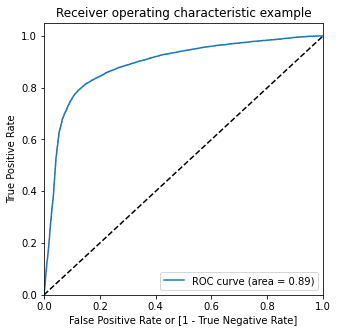

In [ ]:
drawRoc(y_train_pred_final.churn, y_train_pred_final.churn_Prob)

In [ ]:
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.churn_Prob.map(lambda x: 1 if x > i else 0)

y_train_pred_final.head()

,churn,churn_Prob,id,churn_Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.000523,23364,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.953268,46141,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.211367,18234,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.915186,33837,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.927365,3882,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500169  1.000000  0.000000
0.1   0.1  0.650879  0.969269  0.332274
0.2   0.2  0.719005  0.943226  0.494632
0.3   0.3  0.767175  0.913641  0.620609
0.4   0.4  0.804507  0.878483  0.730481
0.5   0.5  0.826234  0.834210  0.818253
0.6   0.6  0.832851  0.783947  0.881789
0.7   0.7  0.815996  0.710766  0.921297
0.8   0.8  0.765091  0.578780  0.951527
0.9   0.9  0.588667  0.194646  0.982956


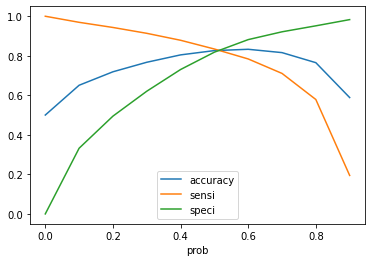

In [ ]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [ ]:
cm = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final.churn_Predicted)
cm

array([[11907,  7279],
       [ 1658, 17541]])

In [ ]:
accuracy = metrics.accuracy_score(y_train_pred_final.churn, y_train_pred_final.churn_Predicted)*100

tn, fp, fn, tp = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final.churn_Predicted).ravel()
specificity = tn / (tn + fp)*100

recall = metrics.recall_score(y_train_pred_final.churn, y_train_pred_final.churn_Predicted)*100

precision = metrics.precision_score(y_train_pred_final.churn, y_train_pred_final.churn_Predicted)*100

f1_score = metrics.f1_score(y_train_pred_final.churn, y_train_pred_final.churn_Predicted)*100

print("Accuracy: {0} %".format(round(accuracy, 2)))
print("Specificity: {0} %".format(round(specificity, 2)))
print("Recall: {0} %".format(round(recall, 2)))
print("Precision: {0} %".format(round(precision, 2)))
print("F1-Score: {0} %".format(round(f1_score, 2)))

Accuracy: 76.72 %
Specificity: 62.06 %
Recall: 91.36 %
Precision: 70.67 %
F1-Score: 79.7 %


### Optimal cut-off point seems to be at 0.5 based on prob curve
- Also Accuracy and Precision score is quite low but Recall score is high
- Let's try to improve metrics other than Recall by using optimal cutoff point

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,churn,churn_Prob,id,churn_Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.000523,23364,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.953268,46141,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.211367,18234,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.915186,33837,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.927365,3882,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
accuracy = metrics.accuracy_score(y_train_pred_final.churn, y_train_pred_final.final_predicted)*100

tn, fp, fn, tp = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final.final_predicted).ravel()
specificity = tn / (tn + fp)*100

recall = metrics.recall_score(y_train_pred_final.churn, y_train_pred_final.final_predicted)*100

precision = metrics.precision_score(y_train_pred_final.churn, y_train_pred_final.final_predicted)*100

f1_score = metrics.f1_score(y_train_pred_final.churn, y_train_pred_final.final_predicted)*100

print("Accuracy: {0} %".format(round(accuracy, 2)))
print("Specificity: {0} %".format(round(specificity, 2)))
print("Recall: {0} %".format(round(recall, 2)))
print("Precision: {0} %".format(round(precision, 2)))
print("F1-Score: {0} %".format(round(f1_score, 2)))

Accuracy: 82.62 %
Specificity: 81.83 %
Recall: 83.42 %
Precision: 82.12 %
F1-Score: 82.77 %


### Conclusion
- Model is doing pretty well in Predicting the Churned customers
- All the matrices are above 82% (Specially Recall) which is a good sign

### Prediction on Test Data

In [ ]:
# apply scaling on the X_test data

X_test = test_set[X_train_sm.columns.drop(['const'])]
y_test = test_set.pop('churn')

stdScaler = StandardScaler()
X_test[X_test.columns] = stdScaler.fit_transform(X_test[X_test.columns])
X_test_final = sm.add_constant(X_test)
X_test_final.head()

,const,arpu_6,arpu_7,arpu_8,roam_og_mou_8,std_og_t2t_mou_7,std_og_t2t_mou_8,total_og_mou_7,total_ic_mou_8,fb_user_8
48765,1.0,2.489618,3.070035,1.289703,-0.267811,-0.358947,-0.144864,3.795068,-0.187150,0.645876
4625,1.0,-0.612625,-0.721219,-0.279711,-0.385986,1.368221,1.681211,0.138502,-0.435863,-0.531830
10170,1.0,-0.826441,-0.643694,0.117823,-0.385986,-0.260744,0.296063,0.102787,-0.528422,-0.531830
17319,1.0,-0.543894,-0.471460,0.550439,-0.385986,-0.539256,-0.405170,-0.383189,4.313127,-0.531830
20407,1.0,-0.782550,-0.618077,0.210600,-0.385986,-0.539256,-0.405170,-0.223782,2.296217,-0.531830


In [ ]:
y_test_pred = lmfit.predict(X_test_final)
y_test_pred = y_test_pred.values.reshape(-1)


In [ ]:
y_test_pred_final = pd.DataFrame({'churn': y_test.values, 'churn_Prob': y_test_pred})
y_test_pred_final['id'] = y_test.index
y_test_pred_final.head()

,churn,churn_Prob,id
0,1,0.601738,48765
1,0,0.500232,4625
2,0,0.401257,10170
3,0,0.000626,17319
4,0,0.013078,20407


In [ ]:
y_test_pred_final['churn_Predicted'] = y_test_pred_final.churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_final.head()

,churn,churn_Prob,id,churn_Predicted
0,1,0.601738,48765,1
1,0,0.500232,4625,1
2,0,0.401257,10170,0
3,0,0.000626,17319,0
4,0,0.013078,20407,0


In [ ]:
metrics.confusion_matrix(y_test_pred_final.churn, y_test_pred_final.churn_Predicted)

array([[6629, 1603],
       [1422, 6797]])

In [ ]:
accuracy = metrics.accuracy_score(y_test_pred_final.churn, y_test_pred_final.churn_Predicted)*100

tn, fp, fn, tp = metrics.confusion_matrix(y_test_pred_final.churn, y_test_pred_final.churn_Predicted).ravel()
specificity = tn / (tn + fp)*100

recall = metrics.recall_score(y_test_pred_final.churn, y_test_pred_final.churn_Predicted)*100

precision = metrics.precision_score(y_test_pred_final.churn, y_test_pred_final.churn_Predicted)*100

f1_score = metrics.f1_score(y_test_pred_final.churn, y_test_pred_final.churn_Predicted)*100

print("Accuracy: {0} %".format(round(accuracy, 2)))
print("Specificity: {0} %".format(round(specificity, 2)))
print("Recall: {0} %".format(round(recall, 2)))
print("Precision: {0} %".format(round(precision, 2)))
print("F1-Score: {0} %".format(round(f1_score, 2)))

Accuracy: 81.61 %
Specificity: 80.53 %
Recall: 82.7 %
Precision: 80.92 %
F1-Score: 81.8 %


### Conclusion on Intepretable Model
- Model is doing pretty well in Predicting the Churned customers in Train data as well as in Test Data
- All the matrices Accuracy, Specificity, Recall, Precision are above 80%

## High Performance Models

### Principal Component Analysis

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=100)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='randomized', tol=0.0, whiten=False)

In [ ]:
pca.explained_variance_ratio_

array([1.37158007e-01, 9.38079400e-02, 6.60113447e-02, 5.20825465e-02,
       3.99505224e-02, 3.27743685e-02, 3.10752743e-02, 2.90427930e-02,
       2.45174663e-02, 2.26582548e-02, 2.09939022e-02, 1.96695447e-02,
       1.90504623e-02, 1.77352118e-02, 1.58139268e-02, 1.50364874e-02,
       1.41457232e-02, 1.36814671e-02, 1.29871827e-02, 1.09919193e-02,
       1.06245578e-02, 1.03389199e-02, 9.94929354e-03, 9.34579699e-03,
       9.31304618e-03, 8.93776551e-03, 8.61586753e-03, 8.43966308e-03,
       7.74604975e-03, 7.33460231e-03, 7.04996535e-03, 6.93521135e-03,
       6.41366976e-03, 6.27321533e-03, 6.23556954e-03, 6.04637803e-03,
       5.95727094e-03, 5.86089065e-03, 5.54399768e-03, 5.36095387e-03,
       5.32335272e-03, 5.15056752e-03, 4.95016281e-03, 4.88448268e-03,
       4.85850618e-03, 4.57115597e-03, 4.55569991e-03, 4.33976608e-03,
       4.29030049e-03, 4.04360699e-03, 3.82157263e-03, 3.75991499e-03,
       3.60069197e-03, 3.51878044e-03, 3.35978140e-03, 3.20132312e-03,
      

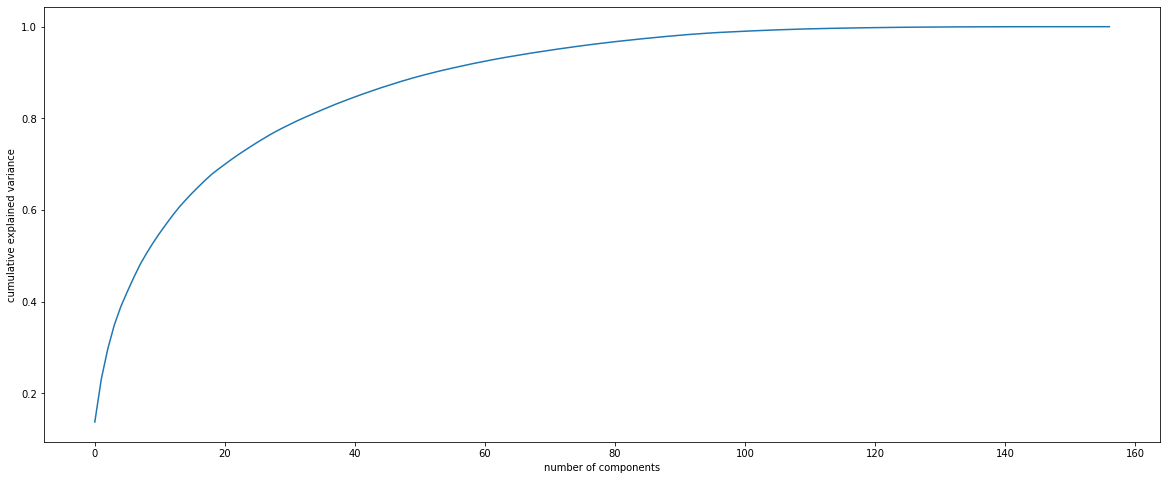

In [ ]:
fig = plt.figure(figsize = (20,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

##### According to PCA Plot, its shows that around 70 components can cover 95% of the variance

### We will perform Incremental PCA with 70 components for better results

In [ ]:
from sklearn.decomposition import IncrementalPCA
pca_incre = IncrementalPCA(n_components=70)

In [ ]:
X_train_pca = pca_incre.fit_transform(X_train)
X_train_pca.shape

(38385, 70)

## Build High Perfomance model using Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

rfEstimator = RandomForestClassifier(class_weight='balanced', random_state=100)

#### Hyper Parameter Tuning for Random forest

In [ ]:
def plotScores(grid_rf, parameter):
  scores = grid_rf.cv_results_.
  plt.figure()
  plt.plot(scores["param_"+parameter], 
           scores["mean_train_score"], 
           label="training accuracy")
  plt.plot(scores["param_"+parameter], 
          scores["mean_test_score"], 
          label="test accuracy")
  plt.xlabel(parameter)
  plt.ylabel("Accuracy")
  plt.legend()
  plt.show()

##### Tune max_depth, min_sample_split, min_sample_leaf parameter

In [ ]:
para_grids = { "max_depth": [10,20,30] }

grid_rf_max_depth = GridSearchCV(rfEstimator, para_grids, verbose=1, n_jobs=-1, cv=5, return_train_score=True)
grid_rf_max_depth.fit(X_train_pca, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  5.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                           

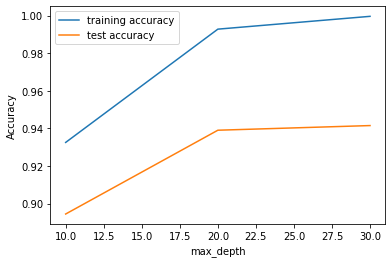

In [ ]:
plotScores(grid_rf_max_depth, 'max_depth')

# max_depth optimal value seems to be 20

In [ ]:
para_grids = { "min_samples_leaf": [100,200,300,400,500] }

rfEstimator = RandomForestClassifier(class_weight='balanced', max_depth=20, random_state=100)
grid_rf_min_leaf = GridSearchCV(rfEstimator, para_grids, verbose=1, n_jobs=-1, cv=5, return_train_score=True)
grid_rf_min_leaf.fit(X_train_pca, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  4.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=20,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                             

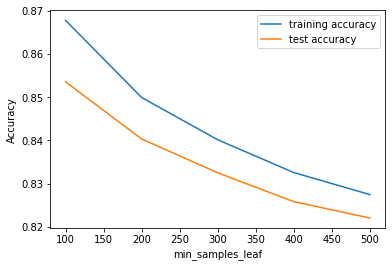

In [ ]:
plotScores(grid_rf_min_leaf, 'min_samples_leaf')

In [ ]:
para_grids = { "min_samples_split": [10,20,50,100,150,200,300] }

rfEstimator = RandomForestClassifier(class_weight='balanced', max_depth=20, min_samples_leaf=100, random_state=100)
grid_rf_min_split = GridSearchCV(rfEstimator, para_grids, verbose=1, n_jobs=-1, cv=5, return_train_score=True)
grid_rf_min_split.fit(X_train_pca, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:  8.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=20,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=100,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                           

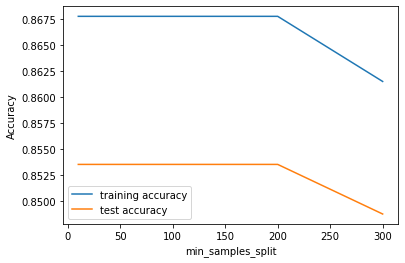

In [ ]:
plotScores(grid_rf_min_split, 'min_samples_split')

###### Based on plots above 
- max_depth should be 20
- min_sample_leaf should be 100
- min_sample_split should be 200

#### Use Optimal Paramerter in Random Forest Classifier and Predict on Train and test set

In [ ]:
rfEstimator = RandomForestClassifier(class_weight='balanced', random_state=100, min_samples_leaf=100, min_samples_split=200, max_depth=20)

In [ ]:
rfPCA = rfEstimator.fit(X_train_pca, y_train)
X_train_pred_rf = rfPCA.predict(X_train_pca)

In [ ]:
print ("Random Forest Accuracy:", metrics.accuracy_score(y_train, X_train_pred_rf)*100)
print ("Randon Forest Recall:", metrics.recall_score(y_train, X_train_pred_rf)*100)

Random Forest Accuracy: 87.15383613390647
Randon Forest Recall: 85.30652638158237


In [ ]:
X_test = test_set[X_train.columns]

stdScaler = StandardScaler()
X_test[X_test.columns] = stdScaler.fit_transform(X_test[X_test.columns])

In [ ]:
pca_incre = IncrementalPCA(n_components=70)
X_test_pca = pca_incre.fit_transform(X_test)
X_test_pca.shape

(16451, 70)

In [ ]:
X_test_pred_rf = rfPCA.predict(X_test_pca)
print ("Random Forest Accuracy:", metrics.accuracy_score(y_test, X_test_pred_rf)*100)
print ("Randon Forest Recall:", metrics.recall_score(y_test, X_test_pred_rf)*100)

Random Forest Accuracy: 81.58774542580997
Randon Forest Recall: 76.17715050492761


## Build High Perfomance model using XG Boost

In [ ]:
import xgboost as xgb
xg_reg = xgb.XGBClassifier(n_jobs=-1)

In [ ]:
xg_reg.fit(X_train_pca, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_train_pred_xg = xg_reg.predict(X_train_pca)
print ("XGBoost Accuracy:", metrics.accuracy_score(y_train, y_train_pred_xg)*100)
print ("XGBoost Recall:", metrics.recall_score(y_train, y_train_pred_xg)*100)

XGBoost Accuracy: 87.13299465937216
XGBoost Recall: 87.86915985207563


#### Hyperparameter tuning for XGBoost

In [ ]:
para_grids = {
  "max_depth": [2,3,4,5]
}

xg_reg = xgb.XGBClassifier(n_jobs=-1, learning_rate=0.1, objective = 'reg:squarederror')
grid_xg = GridSearchCV(xg_reg, para_grids, verbose=1, n_jobs=-1, cv=5, return_train_score=True)
grid_xg.fit(X_train_pca, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  5.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=-1,
                                     nthread=None, objective='reg:squarederror',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=True, scoring=None, verbose=1)

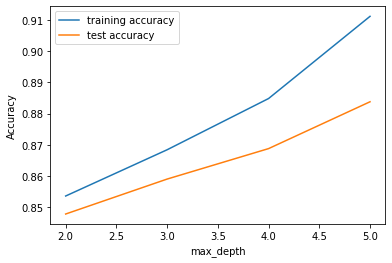

In [ ]:
plotScores(grid_xg, 'max_depth')

In [ ]:
grid_xg.best_params_

{'max_depth': 5}

##### We will take Optimal max_depth for XGBoost will be 4
  - lets not go above 4 as it will start overfitting the train data and will decrease the accuracy and Recall score for Test data

In [ ]:
xg_reg = xgb.XGBClassifier(n_jobs=-1, learning_rate=0.1, max_depth=4, objective = 'reg:squarederror')
xg_reg.fit(X_train_pca, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='reg:squarederror', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_train_pred_xg = xg_reg.predict(X_train_pca)

print ("XGBoost Accuracy:", metrics.accuracy_score(y_train, y_train_pred_xg)*100)
print ("XGBoost Recall:", metrics.recall_score(y_train, y_train_pred_xg)*100)

XGBoost Accuracy: 88.35482610394686
XGBoost Recall: 88.95775821657378


In [ ]:
X_test_pred_xg = xg_reg.predict(X_test_pca)
print ("XGBoost Accuracy:", metrics.accuracy_score(y_test, X_test_pred_xg)*100)
print ("XGBoost Recall:", metrics.recall_score(y_test, X_test_pred_xg)*100)

XGBoost Accuracy: 83.61193848398274
XGBoost Recall: 83.33130551161942


# Final Conclusion
- Logistic Regression
  - Accuracy: 82.62 %
  - Specificity: 81.83 %
  - Recall: 83.42 %
- Random Forest
  - Accuracy: 87.15 %
  - Recall: 87.89 %
- XG Boost
  - Accuracy: 88.35 %
  - Recall: 88.95 %

#### Based on Interpretable (Logistic Regression) Model Summary
- Below are the most significant variables which are contributing whether customer will Churn or not
- total_ic_mou_8
- arpu_8
- arpu_7
- fb_user_8
- roam_og_mou_8
- arpu_6
- std_og_t2t_mou_8
- std_og_t2t_mou_7
- total_og_mou_7
- total_rech_amount

# Recommendations for Management
- If incoming calls (total_ic_mou_8) are going down that means that means user has planning to move to another network or already moved.
- If average revenue per user (arpu_8,arpu_7) is going down during July and Aug month we can say that user is planning to leave the network.
- If Total Recharge Amount is decreasing during Aug month that can be also a good indicator of Customer might churn.
- If Total outgoing calls (total_og_mou_7) is going down then it means that person is using different network for outgoing calls.
- If STD calls (std_og_t2t_mou_8, std_og_t2t_mou_7) for the same network is going down that means customers relative might moved to different network and customer is also planning to other network so that he has to pay less using the same network as them.

- In all the above scenarios management can give offer to the customer to retain him/her.